In [1]:
from visor_dataset import visor_dataset
import numpy as np
from torch.utils.data import DataLoader
import torchvision
import pickle


def get_encoder(device,model_name='resnet18'):
    model=torchvision.models.resnet18(weights=True).to(device)
    model.eval()
    return model

def compute_feature_map(device,encoder,input,layer_name,stride=1,radius=8,encoder_inpur_shape=(32,32),feats_dim=512):
    """
    encoder inference on a single input 2d-image
    
    input(numpy)--> test_dataset
    collect feats during inference
    reshape feats to featsmap
    """

        
    test_dataset=visor_dataset(input,stride,radius,net_input_shape=encoder_inpur_shape)
    test_loader=DataLoader(test_dataset,batch_size=64,shuffle=False)

    # a dict to store the activations
    activation = {}
    def getActivation(name):
        # the hook signature
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook

    #register the forward hook at layer"layer_name"
    hook1 = getattr(encoder,layer_name).register_forward_hook(getActivation(layer_name))

    feats_list=[]
    for i, imgs in enumerate(test_loader):
        outs=encoder(imgs.to(device))
        feats_list.append(activation[layer_name].cpu().detach().numpy())
    
    #detach the hook
    hook1.remove()
    feats_array = np.concatenate([arr.reshape(-1, feats_dim) for arr in feats_list], axis=0)
    pickle.dump(feats_array,open('feats_list.pkl','wb'))
    feats_map=np.reshape(feats_array,(input.shape[0],input.shape[1],feats_dim))
    return feats_map







    



    



ImportError: cannot import name 'visor_preprocess' from 'utilitis' (/Users/cottonfisher/workspace/cluster2boudnary/utilitis.py)

(256, 256)


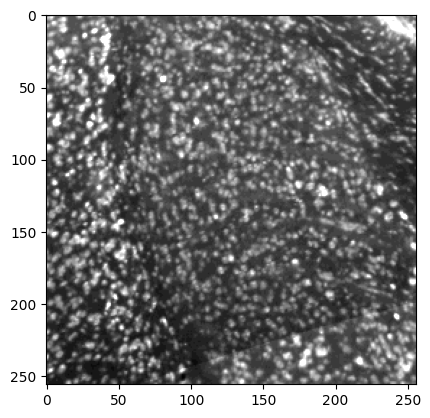

In [2]:
import tifffile as tif
import matplotlib.pyplot as plt
import torch

#load the roi1_img
raw_input=tif.imread("/Users/cottonfisher/workspace/cluster2boudnary/t11/r0c2_idx2000_no0.tif")
roi1_idx=[[935,417+50],[935+256,417+50+256]]
img=raw_input[roi1_idx[0][0]:roi1_idx[1][0],roi1_idx[0][1]:roi1_idx[1][1]]
plt.imshow(img,cmap='gray',vmax=np.percentile(img,99))
print(img.shape)





In [3]:


device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
encoder=get_encoder(device)
feats_map=compute_feature_map(device,encoder,img,layer_name='avgpool',stride=1,radius=12,encoder_inpur_shape=(32,32))

pickle.dump(feats_map,open('feats_map.pkl','wb'))



/Users/cottonfisher/miniconda3/envs/pytorch/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


u:0,d:12,l:0,r:12
u:0,d:12,l:1,r:12
u:0,d:12,l:2,r:12
u:0,d:12,l:3,r:12
u:0,d:12,l:4,r:12
u:0,d:12,l:5,r:12
u:0,d:12,l:6,r:12
u:0,d:12,l:7,r:12
u:0,d:12,l:8,r:12
u:0,d:12,l:9,r:12
u:0,d:12,l:10,r:12
u:0,d:12,l:11,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0,d:12,l:12,r:12
u:0

In [1]:
from sklearn.cluster import KMeans
import random
import pickle
import tifffile as tif
%pdb on
def visualize_clusters(feats_map,img, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(feats_map.reshape(img.shape[0]*img.shape[1],-1))

    cluster_labels = kmeans.labels_.reshape(img.shape[0], img.shape[1])

    color_list=[]
    for i in range(n_clusters):
        color = [random.random(), random.random(), random.random()]  # First random color
        color_list.append(color)


    # Create a color map where each cluster gets its respective color
    colored_map = np.zeros((img.shape[0], img.shape[1], 3))

    for label_idx in range(n_clusters):
        colored_map[cluster_labels == label_idx] = color_list[label_idx]

    # Visualize the result
    colored_map='str'
    plt.imshow(colored_map)
    plt.title("Clustered Feature Map with Two Random Colors")
    plt.axis('off')
    plt.show()
    print(colored_map.shape)

feats_map=pickle.load(open('feats_map.pkl','rb'))
raw_input=tif.imread("/Users/cottonfisher/workspace/cluster2boudnary/t11/r0c2_idx2000_no0.tif")
roi1_idx=[[935,417+50],[935+256,417+50+256]]
img=raw_input[roi1_idx[0][0]:roi1_idx[1][0],roi1_idx[0][1]:roi1_idx[1][1]]

visualize_clusters(feats_map,img,n_clusters=3)

Automatic pdb calling has been turned ON


NameError: name 'np' is not defined

> /var/folders/ng/vvr958ln5v38vpm0d0tcrmm00000gn/T/ipykernel_59131/1416319326.py(18)visualize_clusters()
     16 
     17     # Create a color map where each cluster gets its respective color
---> 18     colored_map = np.zeros((img.shape[0], img.shape[1], 3))
     19 
     20     for label_idx in range(n_clusters):

